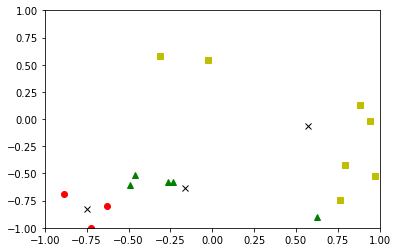

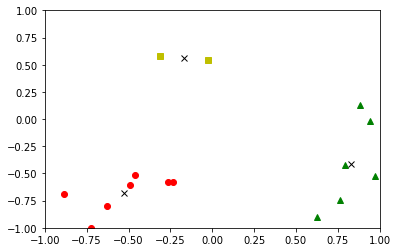

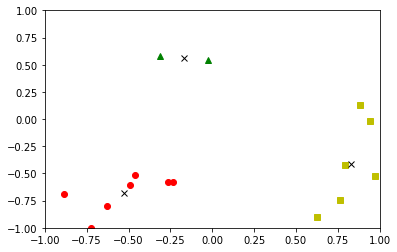

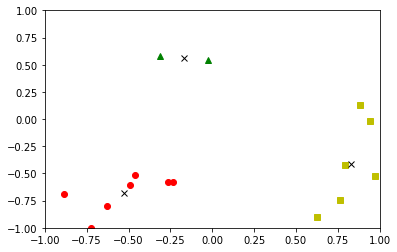

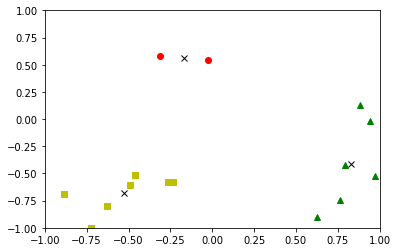

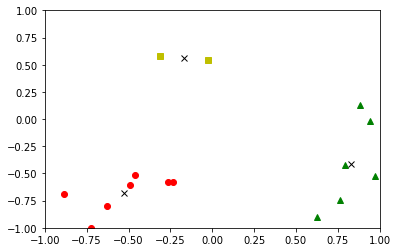

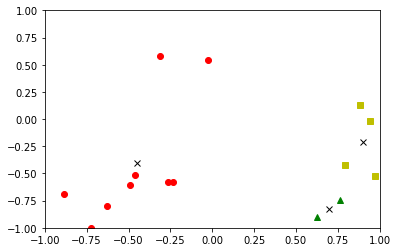

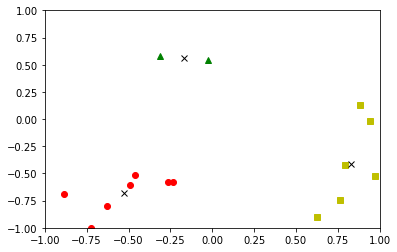

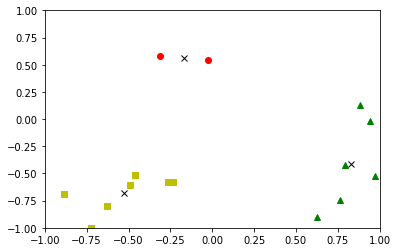

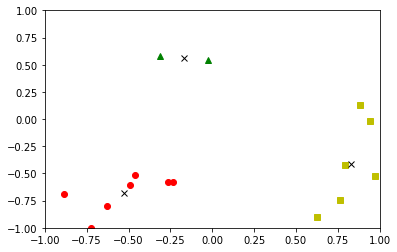

In [1]:
#Taken from https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/
# Just added plotting for 3-k cases

import numpy as np
import random
import matplotlib.pyplot as plt

def init_board(N):
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    return X

def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters

def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu

def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))

def find_centers(X, K):
    # Initialize to K random centers
    oldmu = random.sample(X, K)
    mu = random.sample(X, K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)

def change_coords(array):
    return list(map(list, zip(*array)))

def parse_output(data, i):
    clusters = data[1]
    points1 = change_coords(clusters[0])
    plt.plot(points1[0], points1[1], 'ro')
    points2 = change_coords(clusters[1])
    plt.plot(points2[0], points2[1], 'g^')
    points3 = change_coords(clusters[2])
    plt.plot(points3[0], points3[1], 'ys')
    
    centroids = change_coords(data[0])
    plt.plot(centroids[0], centroids[1], 'kx')
    plt.axis([-1.0, 1, -1.0, 1])
    plt.savefig(f"{i}.png")
    plt.show()

data = init_board(15)
#data = np.array([[0.5,0.5],[0.6,0.6],[-0.5,-0.5], [-0.6,-0.6],[0.124,0.124], [0.135,0.135]])
#print(data)
#print(type(data))
for i in range(10):
    out = find_centers(list(data), 3)
    parse_output(out, i)

### Q2

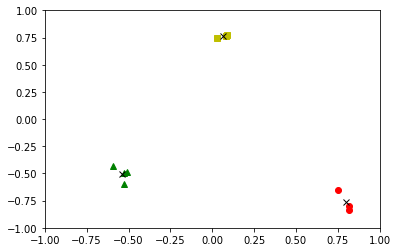

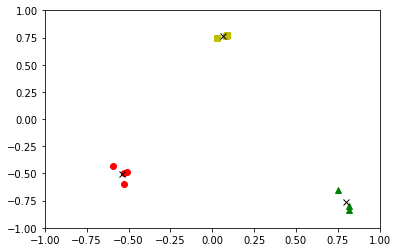

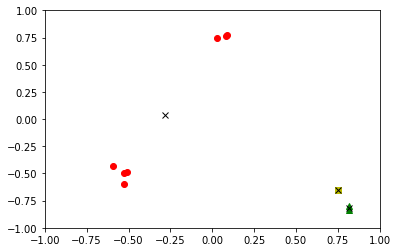

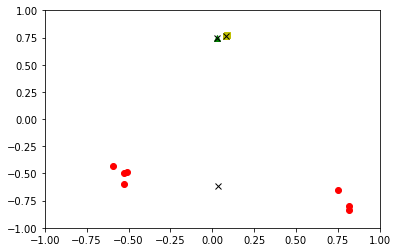

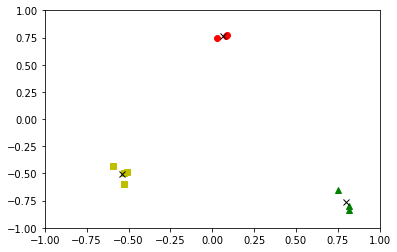

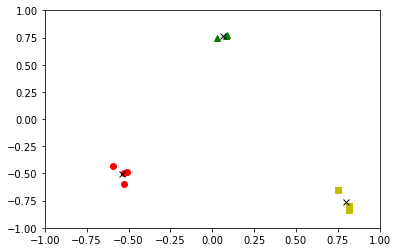

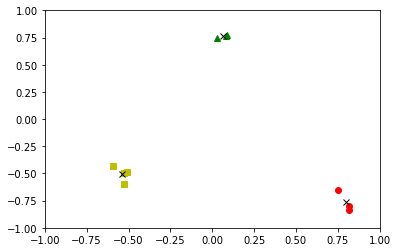

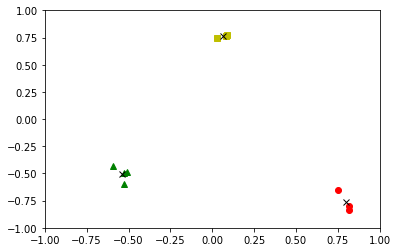

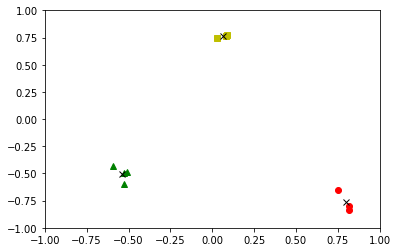

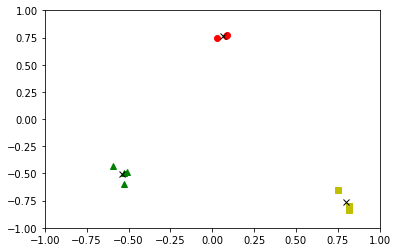

In [4]:
#Taken from https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/
# Just added plotting for 3-k cases

import numpy as np
import random
import matplotlib.pyplot as plt

def init_board(N):
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    return X

def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters

def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu

def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))

def find_centers(X, K):
    # Initialize to K random centers
    oldmu = random.sample(X, K)
    mu = random.sample(X, K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)

def change_coords(array):
    return list(map(list, zip(*array)))

def parse_output(data):
    clusters = data[1]
    points1 = change_coords(clusters[0])
    plt.plot(points1[0], points1[1], 'ro')
    points2 = change_coords(clusters[1])
    plt.plot(points2[0], points2[1], 'g^')
    points3 = change_coords(clusters[2])
    plt.plot(points3[0], points3[1], 'ys')
    
    centroids = change_coords(data[0])
    plt.plot(centroids[0], centroids[1], 'kx')
    plt.axis([-1.0, 1, -1.0, 1])
    #plt.savefig(f"{i}.png")
    plt.show()



# data = np.array([
#     [-0.51, -0.49],[-0.53,-0.60],
#     [-0.59,-0.43], [-0.61,-0.53],
#     [-0.03, 0.04],[-0.09, -0.05], 
#     [0.08, -0.12],[0.82,-0.80], 
#     [0.75,-0.65], [0.71, -0.73], 
# ])



data = np.array([
    [-0.51, -0.49],[-0.53,-0.60],
    [-0.59,-0.43], [-0.53,-0.50],
    [0.03, 0.75],[0.08, 0.76], 
    [0.09, 0.77],[0.82,-0.80], 
    [0.75,-0.65], [0.82,-0.84], 
])

#data = np.array([[0.5,0.5],[0.6,0.6],[-0.5,-0.5], [-0.6,-0.6],[0.124,0.124], [0.135,0.135]])
#print(data)
#print(type(data))
for i in range(10):
    out = find_centers(list(data), 3)
    parse_output(out)